# Curso: Aprendizaje Automático
# Trabajo Práctico 2

Profesor: Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 28 de Octubre 2024, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

Estudiante(s):
1. **Agustin Vargas Quesada**



**Indicaciones Generales:**
- Por favor lea atentamente lo solicitado. Tomado de:
  - Brownlee, J. (2017). Introduction to Time Series Forecasting With Python: How to Prepare Data and Develop Models to Predict the Future. Machine Learning Mastery.
- Se le adjuntan los materiales necesarios para este Trabajo Práctico.
- Por un tema de versiones de bibliotecas, podría requerirse en algún caso modificar el código del PDF para que corra con las versiones actuales. Primero investigue e intente y si no lo logra puede pedir ayuda.


# Parte 1.  Series temporales y graficación

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos 1 a 6. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'daily-max-temperatures.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga.
1. Documente bien su código.


In [1]:
!pip install tabulate
!pip install statsmodels

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

### 1.1 (5 puntos)
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [3]:
# Cargar el archivo
series = pd.read_csv('daily-max-temperatures.csv', delimiter=',')

In [4]:
print(tabulate(series.head(5), headers='keys', tablefmt='grid'))

+----+------------+---------------+
|    | Date       |   Temperature |
+====+============+===============+
|  0 | 1981-01-01 |          38.1 |
+----+------------+---------------+
|  1 | 1981-01-02 |          32.4 |
+----+------------+---------------+
|  2 | 1981-01-03 |          34.5 |
+----+------------+---------------+
|  3 | 1981-01-04 |          20.7 |
+----+------------+---------------+
|  4 | 1981-01-05 |          21.5 |
+----+------------+---------------+


In [5]:
print(series.dtypes)

Date            object
Temperature    float64
dtype: object


### 1.2 (5 puntos)
- Muestra el promedio y la desviación estándar de los datos

In [6]:
mean_value = series['Temperature'].mean()
print(f'Promedio: {mean_value}')

Promedio: 20.009150684931505


In [7]:
std_value = series['Temperature'].std()
print(f'Desviación estándar: {std_value}')

Desviación estándar: 6.108353282275072


### 1.3 (5 puntos)
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [8]:
series['Date'] = pd.to_datetime(series['Date'])
print(tabulate(series.head(5), headers='keys', tablefmt='grid'))
print(series.dtypes)

+----+---------------------+---------------+
|    | Date                |   Temperature |
+====+=====================+===============+
|  0 | 1981-01-01 00:00:00 |          38.1 |
+----+---------------------+---------------+
|  1 | 1981-01-02 00:00:00 |          32.4 |
+----+---------------------+---------------+
|  2 | 1981-01-03 00:00:00 |          34.5 |
+----+---------------------+---------------+
|  3 | 1981-01-04 00:00:00 |          20.7 |
+----+---------------------+---------------+
|  4 | 1981-01-05 00:00:00 |          21.5 |
+----+---------------------+---------------+
Date           datetime64[ns]
Temperature           float64
dtype: object


In [9]:
series['Month'] = series['Date'].dt.month
print(tabulate(series.head(5), headers='keys', tablefmt='grid'))

+----+---------------------+---------------+---------+
|    | Date                |   Temperature |   Month |
+====+=====================+===============+=========+
|  0 | 1981-01-01 00:00:00 |          38.1 |       1 |
+----+---------------------+---------------+---------+
|  1 | 1981-01-02 00:00:00 |          32.4 |       1 |
+----+---------------------+---------------+---------+
|  2 | 1981-01-03 00:00:00 |          34.5 |       1 |
+----+---------------------+---------------+---------+
|  3 | 1981-01-04 00:00:00 |          20.7 |       1 |
+----+---------------------+---------------+---------+
|  4 | 1981-01-05 00:00:00 |          21.5 |       1 |
+----+---------------------+---------------+---------+


In [10]:
monthly_mean = series.groupby('Month')['Temperature'].mean()
print(monthly_mean)

Month
1     25.602581
2     26.151064
3     24.220968
4     20.889333
5     17.447419
6     14.240333
7     13.651935
8     15.296774
9     17.246667
10    19.719355
11    22.222667
12    23.824675
Name: Temperature, dtype: float64


### 1.4 (10 puntos)
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=3

In [11]:
df_lag = series.copy()

for i in range(1, 4):
    df_lag[f'lag{i}'] = df_lag['Temperature'].shift(i)

df_lag = df_lag.dropna()

print(tabulate(df_lag.head(), headers='keys', tablefmt='grid'))
print(df_lag.dtypes)

+----+---------------------+---------------+---------+--------+--------+--------+
|    | Date                |   Temperature |   Month |   lag1 |   lag2 |   lag3 |
+====+=====================+===============+=========+========+========+========+
|  3 | 1981-01-04 00:00:00 |          20.7 |       1 |   34.5 |   32.4 |   38.1 |
+----+---------------------+---------------+---------+--------+--------+--------+
|  4 | 1981-01-05 00:00:00 |          21.5 |       1 |   20.7 |   34.5 |   32.4 |
+----+---------------------+---------------+---------+--------+--------+--------+
|  5 | 1981-01-06 00:00:00 |          23.1 |       1 |   21.5 |   20.7 |   34.5 |
+----+---------------------+---------------+---------+--------+--------+--------+
|  6 | 1981-01-07 00:00:00 |          29.7 |       1 |   23.1 |   21.5 |   20.7 |
+----+---------------------+---------------+---------+--------+--------+--------+
|  7 | 1981-01-08 00:00:00 |          36.6 |       1 |   29.7 |   23.1 |   21.5 |
+----+----------

### 1.5 (10 puntos)
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 2. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [12]:
df_window = series.copy()

# Crear las columnas con rolling window
df_window['minimo'] = df_window['Temperature'].rolling(window=2, min_periods=1).min()
df_window['media'] = df_window['Temperature'].rolling(window=2, min_periods=1).mean()
df_window['maximo'] = df_window['Temperature'].rolling(window=2, min_periods=1).max()

df_window['t+1'] = df_window['Temperature'].shift(-1)

df_window = df_window.dropna()

print(f"DataFrame con Rolling Window: {tabulate(df_window.head(), headers='keys', tablefmt='grid')}")

DataFrame con Rolling Window: +----+---------------------+---------------+---------+----------+---------+----------+-------+
|    | Date                |   Temperature |   Month |   minimo |   media |   maximo |   t+1 |
+====+=====================+===============+=========+==========+=========+==========+=======+
|  0 | 1981-01-01 00:00:00 |          38.1 |       1 |     38.1 |   38.1  |     38.1 |  32.4 |
+----+---------------------+---------------+---------+----------+---------+----------+-------+
|  1 | 1981-01-02 00:00:00 |          32.4 |       1 |     32.4 |   35.25 |     38.1 |  34.5 |
+----+---------------------+---------------+---------+----------+---------+----------+-------+
|  2 | 1981-01-03 00:00:00 |          34.5 |       1 |     32.4 |   33.45 |     34.5 |  20.7 |
+----+---------------------+---------------+---------+----------+---------+----------+-------+
|  3 | 1981-01-04 00:00:00 |          20.7 |       1 |     20.7 |   27.6  |     34.5 |  21.5 |
+----+--------------

### 1.6 (5 puntos)
- A la variable series, aplíquele la instrucción series.plot().
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

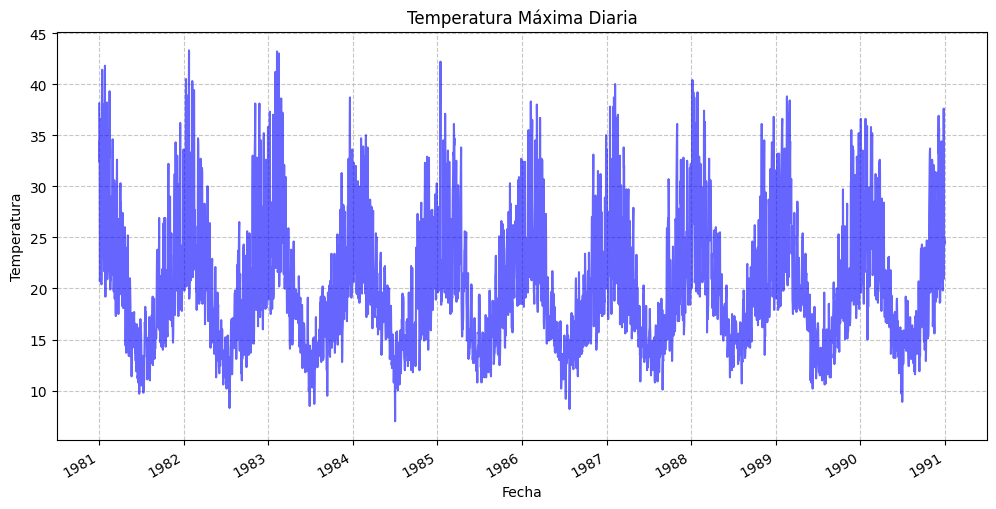

In [13]:
plt.figure(figsize=(12, 6))

series.set_index('Date')['Temperature'].plot(color='blue', alpha=0.6)

plt.title('Temperatura Máxima Diaria', fontsize=12)
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Temperatura', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Segun el grafico se puede ver que el comportamiento de la temperatura posee un patron, se puede decir que al inicio del año hay altas temperaturas, a mediados del año la temperatura baja y al final del año la temperatura vuelve a subir.

### 1.7 (5 puntos)
- Muestre el histograma de la variable series.
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


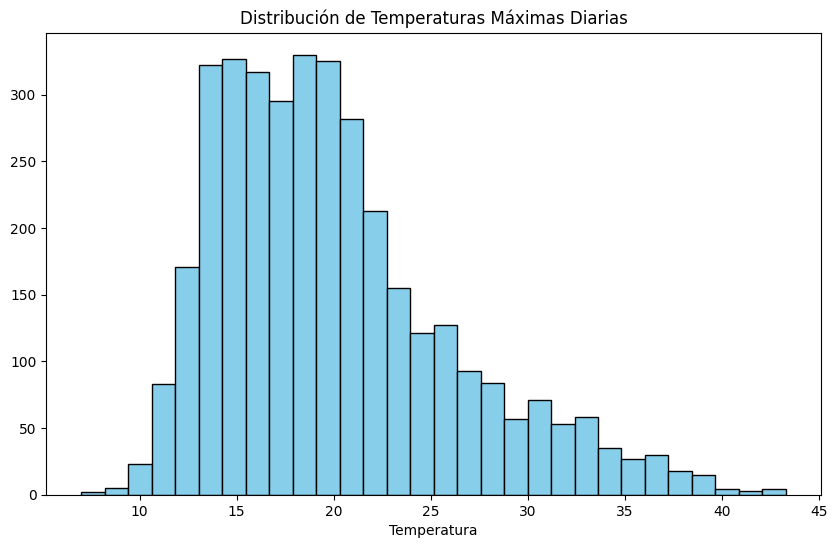

In [14]:
plt.figure(figsize=(10, 6))

plt.hist(series['Temperature'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribución de Temperaturas Máximas Diarias')
plt.xlabel('Temperatura')

# Mostrar el gráfico
plt.show()

Se puede concluir que las temperaturas que mas se repitieron estan entre 12 y 23 que se podria suponer que es la temperatura normal en la que se encuentra la mayor cantidad del año, mientras que temperaturas muy altas o muy bajas tienen muy poca presencia durante el año.

### 1.8 (5 puntos)
- Muestre el gráfico de densidad de la variable series.
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


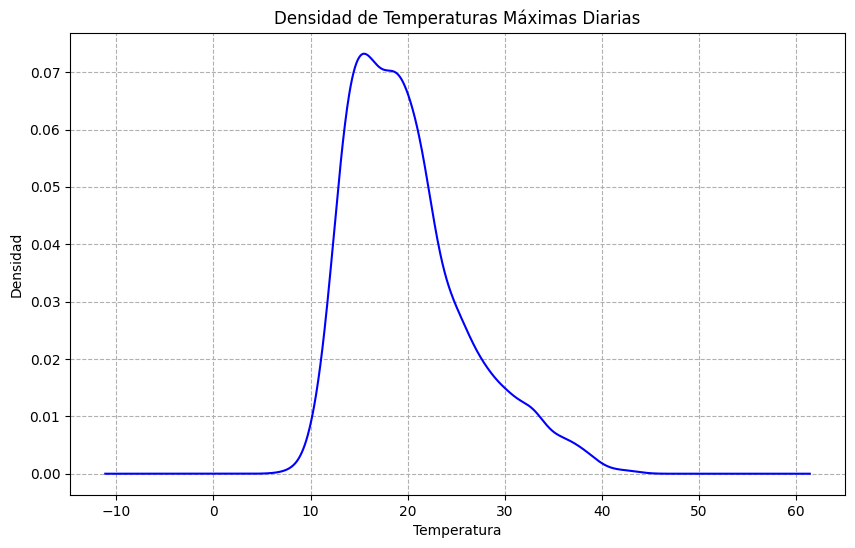

In [15]:
plt.figure(figsize=(10, 6))

series['Temperature'].plot(kind='density', color='blue')

plt.title('Densidad de Temperaturas Máximas Diarias')
plt.xlabel('Temperatura')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--')

plt.show()

Se puede decir que la temperatura posee dos picos, uno que llega aproximadamente a las 12 grados y otro un poco mas bajo que es en una aproximidad de los 18 grados, esto se podria decir que hay mas temperaturas frias durante el año.

### 1.9 (5 puntos)
- Muestre el Lag Scatter plot de la variable series.
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


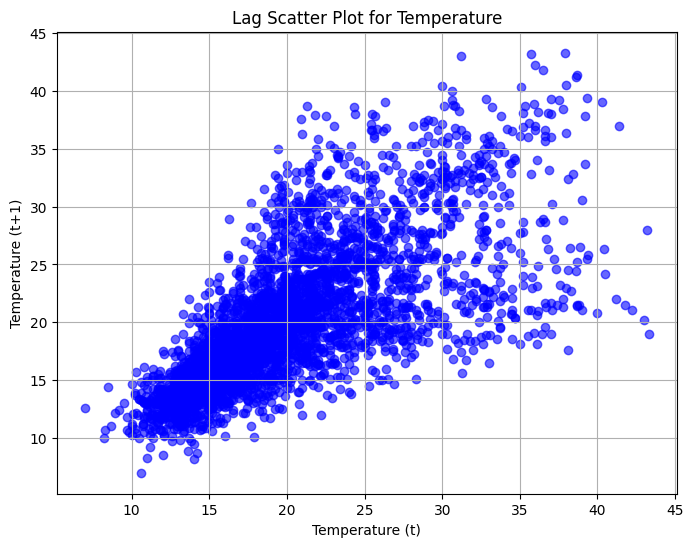

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(series['Temperature'][:-1], series['Temperature'][1:], alpha=0.6, color='blue')
plt.title('Lag Scatter Plot for Temperature', fontsize=12)
plt.xlabel('Temperature (t)', fontsize=10)
plt.ylabel('Temperature (t+1)', fontsize=10)
plt.grid(True)

plt.show()

Para interpretar un Lag Scatter Plot se debe de leer desde la esquina inferior izquierda hasta la esquina superrior derecha, si se forma una diagonal hacia arriba como se ve en el grafico esto quiere decir que los datos poseen una correlacion positiva, ya que esto es un grafico de dispersion los puntos que estan mas seprados de la diagonal nos indica que no estan tan relacionados con los otros datos, entre mas separado este el dato de la diagonal menor es la correlacion.

### 1.10 (5 puntos)
- Muestre el gráfico Autocorrelación de la variable series.
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


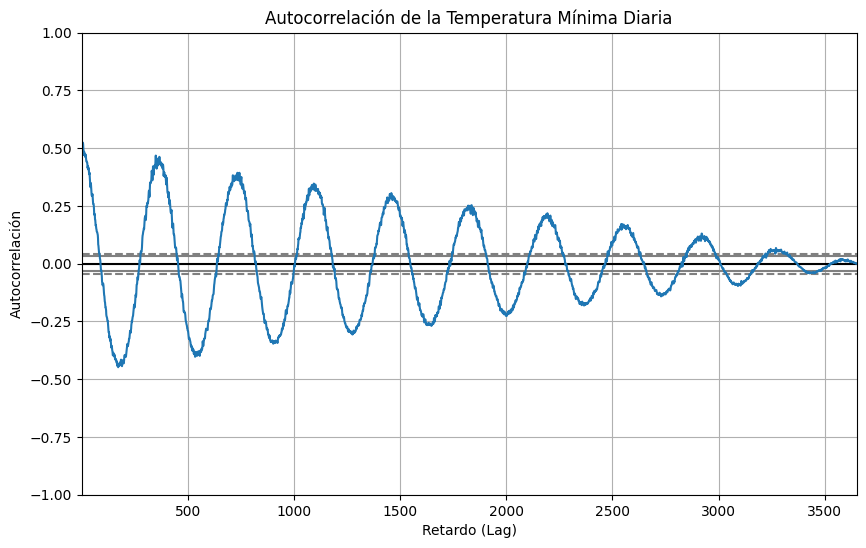

In [21]:
temperatura = series['Temperature']  # Ajusta el nombre de la columna según tus datos

plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(temperatura)
plt.title('Autocorrelación de la Temperatura Mínima Diaria')
plt.xlabel('Retardo (Lag)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

Para interpretar este grafico se debe de tener en cuenta que un valor cercano a cero tiene una correlacion debil como podemos observar al final del grafico, se puede concluir que al incio del grafico que muestra mucho ruido quiere decir que hay una correclacion fuerte y si se va avanzando hacia la derecha el ruido disminuye y esto indica que la correlacion es debil. 

# Parte 2.  Diferenciación

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'yearly-water-usage.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga.
1. Documente bien su código.

### 2.1 (5 puntos)
- Cargue el archivo proporcionado y muestre los 4 primeros registros.

In [23]:
# Cargar el archivo
df = pd.read_csv('yearly-water-usage.csv', delimiter=',')

In [25]:
print(tabulate(df.head(4), headers='keys', tablefmt='grid'))

+----+--------+---------+
|    |   Year |   Water |
+====+========+=========+
|  0 |   1885 |     356 |
+----+--------+---------+
|  1 |   1886 |     386 |
+----+--------+---------+
|  2 |   1887 |     397 |
+----+--------+---------+
|  3 |   1888 |     397 |
+----+--------+---------+


### 2.2 (10 puntos)

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

In [32]:
X = df['Water'].values

# Aplicar el test Augmented Dickey-Fuller
result = adfuller(X)

# Mostrar los resultados
print('ADF Statistic: %.4f' % result[0])
print('p-value: %.4f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Evaluar la estacionariedad con nivel de confianza del 95%
if result[1] < 0.05:
    print("\nLa serie es estacionaria con 95% de confianza.")
else:
    print("\nLa serie no es estacionaria con 95% de confianza.")

ADF Statistic: -2.0771
p-value: 0.2538
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587

La serie no es estacionaria con 95% de confianza.


### 2.3 (10 puntos)

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

In [33]:
serie_original = df['Water'].values

# Aplicar diferenciación
serie_diferenciada = np.diff(serie_original)

# Test ADF en serie original
result_original = adfuller(serie_original)
print('ADF Statistic: %.4f' % result_original[0])
print('p-value: %.4f' % result_original[1])
print('Critical Values:')
for key, value in result_original[4].items():
    print('\t%s: %.3f' % (key, value))

if result_original[1] < 0.05:
    print("\nLa serie original es estacionaria con 95% de confianza.")
else:
    print("\nLa serie original no es estacionaria con 95% de confianza.")

# Test ADF en serie diferenciada
result_diff = adfuller(serie_diferenciada)
print('ADF Statistic: %.4f' % result_diff[0])
print('p-value: %.4f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

if result_diff[1] < 0.05:
    print("\nLa serie diferenciada es estacionaria con 95% de confianza.")
else:
    print("\nLa serie diferenciada no es estacionaria con 95% de confianza.")

print(f"ADF Statistic:     {result_original[0]:9.4f}  {result_diff[0]:11.4f}")
print(f"p-value:           {result_original[1]:9.4f}  {result_diff[1]:11.4f}")

ADF Statistic: -2.0771
p-value: 0.2538
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587

La serie original no es estacionaria con 95% de confianza.
ADF Statistic: -6.6932
p-value: 0.0000
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587

La serie diferenciada es estacionaria con 95% de confianza.
ADF Statistic:       -2.0771      -6.6932
p-value:              0.2538       0.0000


### 2.4 (10 puntos)

- En un mismo gráfico de líneas, presente la serie original (en azul) y la serie diferenciada (en rojo).

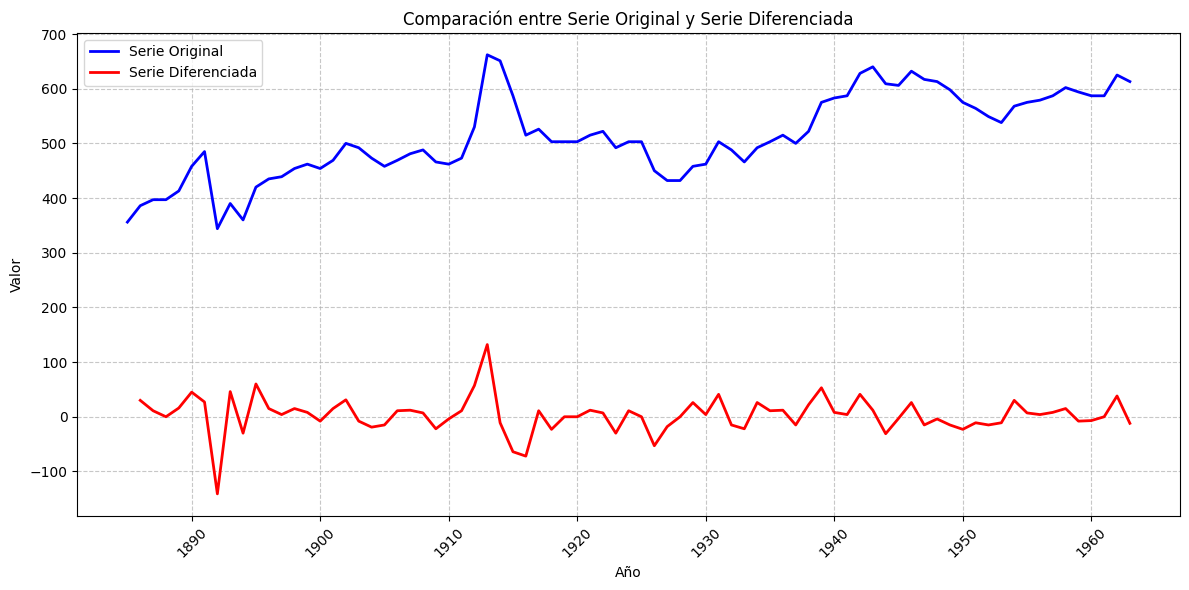

In [34]:
serie_original = df['Water'].values
años = df['Year'].values

# Calcular la serie diferenciada
serie_diferenciada = np.diff(serie_original)

plt.figure(figsize=(12, 6))

# Graficar serie original
plt.plot(años, serie_original, color='blue', label='Serie Original', linewidth=2)

# Graficar serie diferenciada
plt.plot(años[1:], serie_diferenciada, color='red', label='Serie Diferenciada', linewidth=2)

# Personalizar el gráfico
plt.title('Comparación entre Serie Original y Serie Diferenciada', fontsize=12)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### 2.5 (5 puntos)

- ¿Qué cambio nota de la serie antes de diferenciar a la serie diferenciada?


Se puede notar que en la serie diferencia bajo considerablemente cerca de los años 1893 mientras que en la serie original en estos años bajo un poco pero siguio incrementando considerablemente, tuvo su